In [ ]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys

# use a headless browser (saves time)
chrome_options = Options()
# chrome_options.add_argument("--headless")
chrome_options.add_argument("--start-maximized")

# set up and launch the browser
driver = webdriver.Chrome(options=chrome_options)
driver.get("https://app.powerbi.com/view?r=eyJrIjoiZTY4NTI1NzQtYTBhYy00ZTY4LTk3NmQtYjBjNzdiOGMzZjM3IiwidCI6ImI0NmMxOTA4LTAzMzQtNDIzNi1iOTc4LTU4NWVlODhlNDE5OSJ9")

# move to page 2
next_page = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, "pbi-glyph-chevronrightmedium"))
)
next_page.click()

# cycle through days
day = 1
data = pd.DataFrame(columns=["dateString", "Woden Valley", "Weston Creek", "Uriarra", "Tuggeranong", "South Canberra", "North Canberra", "Molonglo", "Gungahlin", "East Canberra", "Belconnen", "unnamed", "total"])

while day < 125:
    # change filter to days
    period_menu = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "period-menu"))
    )
    period_menu.click()
    period_menu = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "period-menu"))
    )
    period_menu.click()
    select_days = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#ui-id-45-menu .ui-menu-item:nth-child(2)"))
    )
    select_days.click()

    # change day value
    day_value = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, ".selection-container input"))
    )
    day_value.click()
    time.sleep(1)
    day_value.send_keys(Keys.BACKSPACE)
    if day > 9:
        day_value.send_keys(Keys.BACKSPACE)
    if day > 99:
        day_value.send_keys(Keys.BACKSPACE)
    day_value.send_keys(day)
    
    # collect data
    time.sleep(2)
    dateString = driver.find_element_by_class_name("restatement").get_attribute("innerText")
    values = driver.find_elements_by_css_selector(".pivotTableCellWrap.tablixAlignRight")
    values = [value.get_attribute("innerText") for value in values]
    data.loc[len(data)] = [dateString] + values
    
    # cycle
    day = day + 1

driver.close()
driver.quit()

data["dateStart"] = data["dateString"].apply(lambda x: pd.to_datetime(x.split(" - ")[0], format="%d/%m/%Y"))
data["dateEnd"] = data["dateString"].apply(lambda x: pd.to_datetime(x.split(" - ")[1], format="%d/%m/%Y"))
data.sort_values("dateStart", inplace=True)
data

In [4]:
data["dateStart"] = data["dateString"].apply(lambda x: pd.to_datetime(x.split(" - ")[0], format="%m/%d/%Y"))
data["dateEnd"] = data["dateString"].apply(lambda x: pd.to_datetime(x.split(" - ")[1], format="%m/%d/%Y"))
data.sort_values("dateStart", inplace=True)
data


,dateString,Woden Valley,Weston Creek,Uriarra,Tuggeranong,South Canberra,North Canberra,Molonglo,Gungahlin,East Canberra,Belconnen,unnamed,total,dateStart,dateEnd
123,7/16/2021 - 11/15/2021,89,62,<5,421,69,262,56,396,9,363,21,1748,2021-07-16,2021-11-15
122,7/17/2021 - 11/15/2021,89,62,<5,421,69,262,56,396,9,363,21,1748,2021-07-17,2021-11-15
121,7/18/2021 - 11/15/2021,89,62,<5,421,69,262,56,396,9,363,21,1748,2021-07-18,2021-11-15
120,7/19/2021 - 11/15/2021,89,62,<5,421,69,262,56,396,9,363,21,1748,2021-07-19,2021-11-15
119,7/20/2021 - 11/15/2021,89,62,<5,421,69,262,56,396,9,363,21,1748,2021-07-20,2021-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,11/11/2021 - 11/15/2021,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,2021-11-11,2021-11-15
4,11/12/2021 - 11/15/2021,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,2021-11-12,2021-11-15
3,11/13/2021 - 11/15/2021,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,2021-11-13,2021-11-15
2,11/14/2021 - 11/15/2021,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,<5,2021-11-14,2021-11-15


In [4]:
results = pd.DataFrame(
    columns=["Woden Valley", "Weston Creek", "Tuggeranong", "South Canberra", "North Canberra", "Molonglo", "Gungahlin", "East Canberra", "Belconnen", "unnamed", "total"]
)
for i, indice in enumerate(data.index):
    for j, column in enumerate(results.columns):
        try:
            results.at[data.at[indice, "dateStart"], column] = float(data.at[indice, column]) - float(data.iloc[i + 1][column])
        except:
            results.at[data.at[indice, "dateStart"], column] = None    

results.index.name = "date"
results.to_csv("covidActResults.csv")

In [6]:
results.tail(60)


,Woden Valley,Weston Creek,Tuggeranong,South Canberra,North Canberra,Molonglo,Gungahlin,East Canberra,Belconnen,unnamed,total
date,,,,,,,,,,,
2021-09-10,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,9.0,0.0,15.0
2021-09-11,0.0,0.0,7.0,0.0,5.0,0.0,5.0,1.0,1.0,0.0,19.0
2021-09-12,2.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,15.0
2021-09-13,2.0,0.0,0.0,0.0,5.0,0.0,8.0,0.0,3.0,0.0,18.0
2021-09-14,0.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,4.0,0.0,12.0
2021-09-15,0.0,0.0,3.0,1.0,1.0,0.0,5.0,0.0,4.0,0.0,14.0
2021-09-16,0.0,0.0,8.0,2.0,5.0,1.0,9.0,0.0,5.0,0.0,30.0
2021-09-17,1.0,0.0,4.0,1.0,4.0,0.0,2.0,0.0,5.0,0.0,17.0
2021-09-18,1.0,1.0,5.0,0.0,1.0,5.0,2.0,1.0,1.0,0.0,17.0


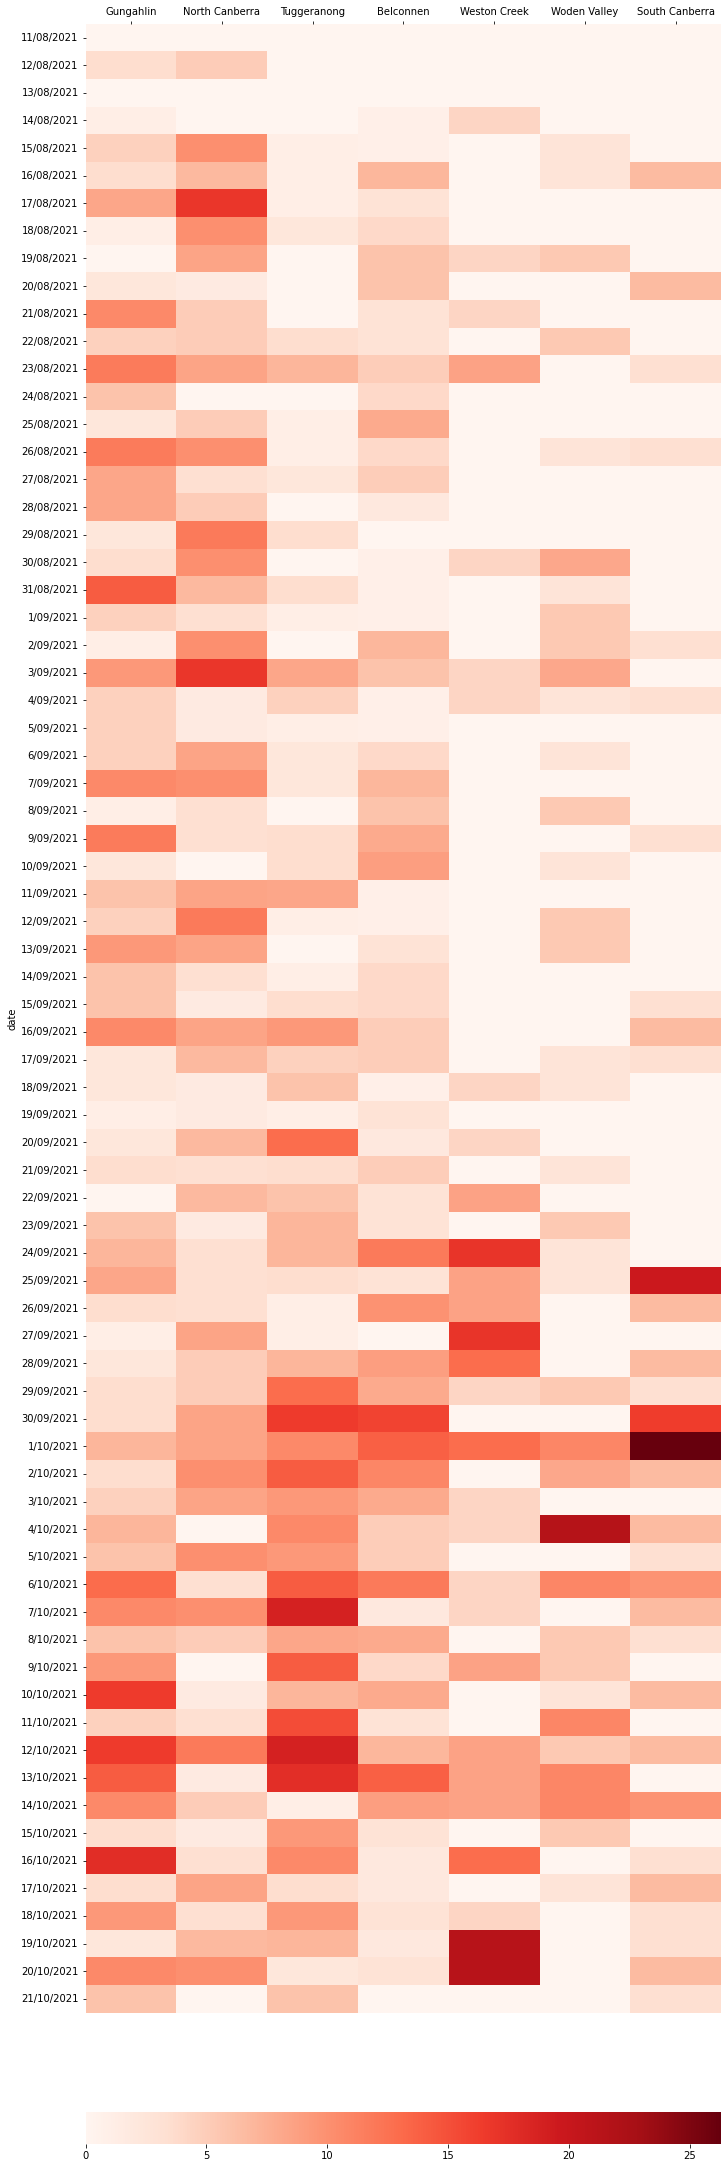

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, matplotlib.dates as mdates

sa3Data = pd.read_csv("covidActResults.csv", index_col="date")
populations = [36942, 23353, 85034, 30412, 59095, 8568, 84684, 101060]
sa3Data = sa3Data / populations * 100000
sa3Data.drop(columns=["Molonglo"], inplace=True)
sa3Data = sa3Data[sa3Data.sum().sort_values(ascending=False).index]
fig, ax = plt.subplots(
    figsize=(10, 30),
    constrained_layout=True
)
chart = sns.heatmap(data=sa3Data, cmap="Reds", ax=ax, cbar_kws={"orientation": "horizontal", "location": "bottom"})
ax.set_xlabel(None)
ax.xaxis.tick_top()
plt.savefig("districtCases.png")

In [2]:
sa3Data.sum()

Gungahlin         436.918426
North Canberra    411.202301
Tuggeranong       386.904062
Belconnen         333.465268
Weston Creek      244.079990
Woden Valley      208.434844
South Canberra    207.155070
dtype: float64

In [109]:
sydney = ["Blue Mountains", "Blacktown", "Bayside", "Hornsby", "Georges River", "Hawkesbury", "Cumberland", "Burwood", "Hunters Hill", "Canterbury-Bankstown", "Penrith", "Parramatta", "Canada Bay", "Ku-ring-gai", "Sutherland", "Camden", "The Hills", "Inner West", "Lane Cove", "Campbelltown", "Randwick", "Northern Beaches", "Fairfield", "Strathfield", "Mosman", "Liverpool", "Woollahra", "Willoughby", "Wollondilly", "Waverley", "Ryde", "Sydney", "North Sydney"]
melbourne = ["Banyule", "Bayside", "Boroondara", "Brimbank", "Cardinia", "Casey", "Darebin", "Frankston", "Glen Eira", "Greater Dandenong", "Hobsons Bay", "Hume", "Kingston", "Knox", "Manningham", "Maribyrnong", "Maroondah", "Melbourne", "Melton", "Mitchell", "Monash", "Moonee Valley", "Moreland", "Mornington Peninsula", "Nillumbik", "Port of Melbourne", "Port Phillip", "Stonnington", "Whitehorse", "Whittlesea", "Wyndham", "Yarra", "Yarra Ranges"]

popData = pd.read_csv("popData.csv", usecols=[4, 5, 10])
popData.columns = ["code", "name", "pop"]
for i in popData.index:
    cut = popData.at[i, "name"].find("(")
    popData.at[i, "name"] = popData.at[i, "name"][:cut - 1] if cut > -1 else popData.at[i, "name"]

nswData = pd.read_csv("nswData.csv", usecols=[0, 4, 5], parse_dates=["notification_date"])
nswData.columns = ["date", "code", "name"]
nswData = nswData[nswData.date > pd.Timestamp("2021-06-15")]
nswData = nswData.groupby("name").count()[["code"]]
nswData.columns = ["cases"]

for i in nswData.index:
    cut = i.find("(")
    lga = i[:cut - 1] if cut > -1 else i    
    councils = popData[popData.name.apply(lambda x: lga == x) & popData.code.apply(lambda x: str(x)[:1] == "1")]
    nswData.at[i, "pop"] = councils.iloc[0]["pop"] if len(councils) == 1 else None

nswData["ratio"] = nswData["cases"] / nswData["pop"] * 100000
# nswData.sort_values("ratio", ascending=False).head(60)

for i in sydney:
    area = nswData.loc[[x for x in nswData.index if i in x]]
#     print(i, area.iloc[0]["ratio"])

vicData = pd.read_csv("vicData.csv")
vicData.columns = ["date", "lga"]
vicData.date = pd.to_datetime(vicData.date, format="%d/%m/%Y")
vicData = vicData[vicData.date > pd.Timestamp("2021-08-04")]
vicData = vicData.groupby("lga").count()
vicData.columns = ["cases"]

for i in vicData.index:
    cut = i.find("(")
    lga = i[:cut - 1] if cut > -1 else i    
    councils = popData[popData.name.apply(lambda x: lga == x) & popData.code.apply(lambda x: str(x)[:1] == "2")]
    vicData.at[i, "pop"] = councils.iloc[0]["pop"] if len(councils) == 1 else None

vicData["ratio"] = vicData["cases"] / vicData["pop"] * 100000
vicData
    
for i in melbourne:
    try:
        area = vicData.loc[[x for x in vicData.index if i in x]]
        print(i, area.iloc[0]["ratio"])
    except:
        print(i)


Banyule 851.9023798696377
Bayside 485.39626747008117
Boroondara 316.3536823240795
Brimbank 2426.9257180175464
Cardinia 1290.0949282659026
Casey 1901.2616566099837
Darebin 1380.7606801658355
Frankston 989.2701167868953
Glen Eira 827.981999292107
Greater Dandenong 2551.6446704125633
Hobsons Bay 1693.6724072961329
Hume 4899.91210176294
Kingston 795.6100972545175
Knox 634.5861565756569
Manningham 604.9841385568801
Maribyrnong 1374.997367922343
Maroondah 566.1594124002312
Melbourne 994.7974487907877
Melton 2870.144927536232
Mitchell 1036.7914034461771
Monash 609.9465198891361
Moonee Valley 1366.9517961640342
Moreland 2202.244095739609
Mornington Peninsula 568.5115656571638
Nillumbik 525.9203606311045
Port of Melbourne
Port Phillip 1176.2079741749374
Stonnington 647.4783752339522
Whitehorse 316.48546214070325
Whittlesea 2553.067358871053
Wyndham 2228.7799953405297
Yarra 1013.3333333333333
Yarra Ranges 443.249663967991


In [108]:
popData[popData.name.apply(lambda x: "Maribyrnong" in x)]

,code,name,pop
173,24330,Maribyrnong,94982


In [110]:
14 / 33

0.42424242424242425